In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/faspy/raw_data/main/trips_data.csv')
print(df.shape)
df.head()

(554, 13)


,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [4]:
df = df.dropna(axis = 0)
df = df.reset_index()

In [5]:
#data pre-processing

#checking categories in product type columns
print(df['Product Type'].value_counts())

#categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}
df['Product Type'] = df['Product Type'].map(product_mapping)

print('\n',df['Product Type'].value_counts())

UberX                   166
uberX                   140
uberX VIP                81
VIP                      69
POOL                     26
UberEATS Marketplace     10
POOL: MATCHED             8
Pool                      6
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
UberBLACK                 1
uberx                     1
Name: Product Type, dtype: int64

 UberX    457
Pool      48
Black      1
Name: Product Type, dtype: int64


In [6]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):
    for col in cols:
        df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
        df[col] = pd.to_datetime(df[col])
    return df
# Applying date_convertion function to date features 
df = date_convertion(df, ['Request Time', 'Begin Trip Time', 'Dropoff Time'])

df.head()

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 525 non-null    int64         
 1   City                  525 non-null    int64         
 2   Product Type          506 non-null    object        
 3   Trip or Order Status  525 non-null    object        
 4   Request Time          525 non-null    datetime64[ns]
 5   Begin Trip Time       525 non-null    datetime64[ns]
 6   Begin Trip Lat        525 non-null    float64       
 7   Begin Trip Lng        525 non-null    float64       
 8   Dropoff Time          525 non-null    datetime64[ns]
 9   Dropoff Lat           525 non-null    float64       
 10  Dropoff Lng           525 non-null    float64       
 11  Distance (miles)      525 non-null    float64       
 12  Fare Amount           525 non-null    float64       
 13  Fare Currency       

In [8]:
df.drop(['Fare Currency'], axis = 1, inplace = True)

In [9]:
df['Year'] = df['Request Time'].dt.year
df['Month'] = df['Request Time'].dt.month
df['Day'] = df['Request Time'].dt.day
df['Day_of_week'] = df['Request Time'].dt.weekday

df.head()

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Year,Month,Day,Day_of_week
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,1,13,2
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,1,13,2
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,1,3,6
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,12,11,4
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,12,11,4


In [10]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['Day_of_week_name']=df['Day_of_week'].map(dw_mapping)

df

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Year,Month,Day,Day_of_week,Day_of_week_name
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,1,13,2,Wednesday
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,1,13,2,Wednesday
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,1,3,6,Sunday
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,12,11,4,Friday
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,12,11,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,549,458,Pool,COMPLETED,2016-06-22 11:07:02,2016-06-22 11:14:17,-23.616073,-46.665949,2016-06-22 11:24:28,-23.602760,-46.644897,2.20,7.84,2016,6,22,2,Wednesday
521,550,458,UberX,COMPLETED,2016-04-07 00:30:46,2016-04-07 00:35:23,-23.569478,-46.672408,2016-04-07 00:50:14,-23.602737,-46.645352,4.08,15.06,2016,4,7,3,Thursday
522,551,458,UberX,COMPLETED,2016-04-06 21:16:52,2016-04-06 21:20:44,-23.602608,-46.645084,2016-04-06 21:41:30,-23.569549,-46.672412,3.45,15.16,2016,4,6,2,Wednesday
523,552,458,UberX,CANCELED,2016-04-06 21:12:03,1970-01-01 00:00:00,-23.601718,-46.646871,1970-01-01 00:00:00,-23.600862,-46.644494,0.00,0.00,2016,4,6,2,Wednesday


In [11]:
df['Date'] = pd.to_datetime(df['Request Time'].dt.date)
df_1 = df.set_index(['Date'])
df_1

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Year,Month,Day,Day_of_week,Day_of_week_name
Date,,,,,,,,,,,,,,,,,,
2021-01-13,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,1,13,2,Wednesday
2021-01-13,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,1,13,2,Wednesday
2021-01-03,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,1,3,6,Sunday
2020-12-11,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,12,11,4,Friday
2020-12-11,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,12,11,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-22,549,458,Pool,COMPLETED,2016-06-22 11:07:02,2016-06-22 11:14:17,-23.616073,-46.665949,2016-06-22 11:24:28,-23.602760,-46.644897,2.20,7.84,2016,6,22,2,Wednesday
2016-04-07,550,458,UberX,COMPLETED,2016-04-07 00:30:46,2016-04-07 00:35:23,-23.569478,-46.672408,2016-04-07 00:50:14,-23.602737,-46.645352,4.08,15.06,2016,4,7,3,Thursday
2016-04-06,551,458,UberX,COMPLETED,2016-04-06 21:16:52,2016-04-06 21:20:44,-23.602608,-46.645084,2016-04-06 21:41:30,-23.569549,-46.672412,3.45,15.16,2016,4,6,2,Wednesday


In [12]:
df

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Year,Month,Day,Day_of_week,Day_of_week_name,Date
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,1,13,2,Wednesday,2021-01-13
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,1,13,2,Wednesday,2021-01-13
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,1,3,6,Sunday,2021-01-03
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,12,11,4,Friday,2020-12-11
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,12,11,4,Friday,2020-12-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,549,458,Pool,COMPLETED,2016-06-22 11:07:02,2016-06-22 11:14:17,-23.616073,-46.665949,2016-06-22 11:24:28,-23.602760,-46.644897,2.20,7.84,2016,6,22,2,Wednesday,2016-06-22
521,550,458,UberX,COMPLETED,2016-04-07 00:30:46,2016-04-07 00:35:23,-23.569478,-46.672408,2016-04-07 00:50:14,-23.602737,-46.645352,4.08,15.06,2016,4,7,3,Thursday,2016-04-07
522,551,458,UberX,COMPLETED,2016-04-06 21:16:52,2016-04-06 21:20:44,-23.602608,-46.645084,2016-04-06 21:41:30,-23.569549,-46.672412,3.45,15.16,2016,4,6,2,Wednesday,2016-04-06
523,552,458,UberX,CANCELED,2016-04-06 21:12:03,1970-01-01 00:00:00,-23.601718,-46.646871,1970-01-01 00:00:00,-23.600862,-46.644494,0.00,0.00,2016,4,6,2,Wednesday,2016-04-06


In [13]:
df['time'] = df['Request Time'].dt.time

In [14]:
# Feature Engineering
df['Distance (km)'] = np.round(df['Distance (miles)']*1.609,2)
df['Amount per km'] = df['Fare Amount']/df['Distance (km)']

df['request_lead_time'] = df['Begin Trip Time'] - df['Request Time']
df['request_lead_time'] = df['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

df['trip_duration'] = df['Dropoff Time'] - df['Begin Trip Time']
df['trip_duration'] = df['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

df.loc[(df['Trip or Order Status'] == 'CANCELED') | (df['Trip or Order Status'] == 'DRIVER_CANCELED'),'request_lead_time']=np.nan
df.loc[(df['Trip or Order Status'] == 'CANCELED') | (df['Trip or Order Status'] == 'DRIVER_CANCELED'),'Amount per km']=np.nan
df.loc[(df['Trip or Order Status'] == 'CANCELED') | (df['Trip or Order Status'] == 'DRIVER_CANCELED'),['Begin Trip Time','Dropoff Time']]= np.nan

In [15]:
df.head()

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,...,Month,Day,Day_of_week,Day_of_week_name,Date,time,Distance (km),Amount per km,request_lead_time,trip_duration
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,...,1,13,2,Wednesday,2021-01-13,22:06:46,7.79,3.803594,4.4,18.1
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,...,1,13,2,Wednesday,2021-01-13,20:21:05,8.54,2.442623,6.4,27.4
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,...,1,3,6,Sunday,2021-01-03,00:23:22,9.49,3.606955,9.6,17.9
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,...,12,11,4,Friday,2020-12-11,23:16:33,31.76,1.850441,11.0,65.2
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,...,12,11,4,Friday,2020-12-11,00:35:46,4.09,3.088020,11.0,11.2


In [16]:
completed_rides = df[(df['Trip or Order Status']!='CANCELED')&(df['Trip or Order Status']!='DRIVER_CANCELED')]
print(completed_rides.shape)
completed_rides.head()

(453, 24)


,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,...,Month,Day,Day_of_week,Day_of_week_name,Date,time,Distance (km),Amount per km,request_lead_time,trip_duration
0,0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,...,1,13,2,Wednesday,2021-01-13,22:06:46,7.79,3.803594,4.4,18.1
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,...,1,13,2,Wednesday,2021-01-13,20:21:05,8.54,2.442623,6.4,27.4
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,...,1,3,6,Sunday,2021-01-03,00:23:22,9.49,3.606955,9.6,17.9
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,...,12,11,4,Friday,2020-12-11,23:16:33,31.76,1.850441,11.0,65.2
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,...,12,11,4,Friday,2020-12-11,00:35:46,4.09,3.088020,11.0,11.2


Total trips =  525
completed trips =  453
Number of trips per year:
 2018    148
2017    120
2019    113
2020     52
2016     17
2021      3
Name: Year, dtype: int64


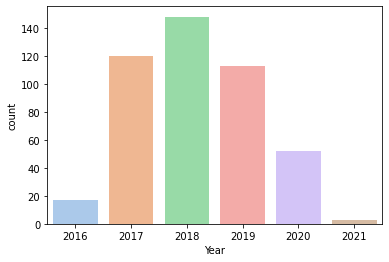

In [17]:
#How many times have the person traveled in the past?
print('Total trips = ', (df['Trip or Order Status'].count()))
print('completed trips = ', (completed_rides['Trip or Order Status'].count()))
print('Number of trips per year:\n',completed_rides.Year.value_counts())
sns.countplot(data=completed_rides, x='Year', palette='pastel');

Total trips =  525
COMPLETED          86.29
CANCELED           11.81
DRIVER_CANCELED     1.90
Name: Trip or Order Status, dtype: float64


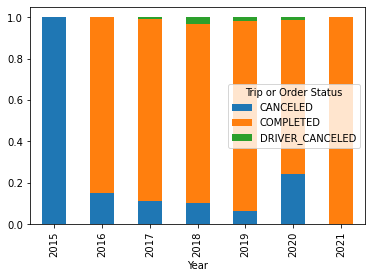

In [18]:
#How many trips were completed or canceled?
print('Total trips = ', (df['Trip or Order Status'].count()))
print(round(df['Trip or Order Status'].value_counts()/df['Trip or Order Status'].size*100,2))
df.groupby(by=['Year'])['Trip or Order Status'].value_counts(normalize=True).unstack('Trip or Order Status').plot.bar(stacked=True);

In [19]:
#Where did most of the layoffs take place?
import folium
from folium import plugins
coord=[]
for lat,lng in zip(completed_rides['Dropoff Lat'].values,completed_rides['Dropoff Lng'].values):
    coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))
map

       Total rides  Percentage
UberX          457       87.05
Pool            48        9.14
Black            1        0.19


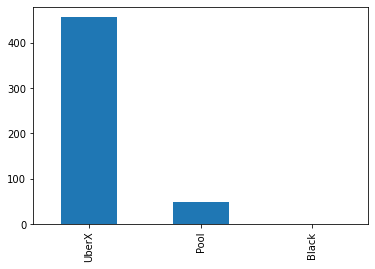

In [20]:
#What type of product is most often selected?
s1 = pd.Series(df['Product Type'].value_counts())
s2 = pd.Series(round(df['Product Type'].value_counts()/df['Product Type'].size*100,2))
product = pd.concat([s1,s2], axis = 1)
product.columns = ['Total rides', 'Percentage']
print(product)
df['Product Type'].value_counts().plot.bar();

In [21]:
#How much is the fare, distance, amount, and time spent on the ride?
new_df = pd.concat([df['Fare Amount'], df['Distance (km)'], df['Amount per km'], df['trip_duration']], axis = 1)
new_df.head()

,Fare Amount,Distance (km),Amount per km,trip_duration
0,29.63,7.79,3.803594,18.1
1,20.86,8.54,2.442623,27.4
2,34.23,9.49,3.606955,17.9
3,58.77,31.76,1.850441,65.2
4,12.63,4.09,3.088020,11.2


In [22]:
print('Average fare = ',round(new_df['Fare Amount'].mean(), 2))
print('Average distance travelled = ',round(new_df['Distance (km)'].mean(),2))
print('Average fare per km = ',round(new_df['Amount per km'].mean(),2))
print('Average time duration = ',round(new_df['trip_duration'].mean(),2))

print('Total fare amount = ', round(new_df['Fare Amount'].sum(), 2))
print('Total distance = ', round(new_df['Distance (km)'].sum(), 2))
print('Total time spent = ', round(new_df['trip_duration'].sum(), 2))

Average fare =  17.18
Average distance travelled =  6.87
Average fare per km =  3.43
Average time duration =  -340895.25
Total fare amount =  9019.32
Total distance =  3607.81
Total time spent =  -178970004.5


In [23]:
#Which days of the week have the highest number of rides per kilometer?
df['Day_of_week_name'].value_counts()

Wednesday    112
Friday        83
Thursday      81
Monday        81
Saturday      70
Sunday        52
Tuesday       46
Name: Day_of_week_name, dtype: int64

<AxesSubplot:xlabel='Year'>

<Figure size 2160x1440 with 0 Axes>

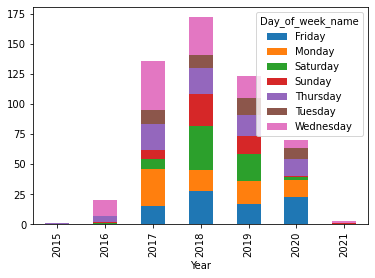

In [24]:
plt.figure(figsize = (30,20))
amount_table = df.groupby(by=['Year'])['Day_of_week_name'].value_counts().unstack('Day_of_week_name')
amount_table.plot.bar(stacked = True)

In [25]:
amount_table.head()

Day_of_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2015,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2016,NaN,NaN,1.0,1.0,5.0,NaN,13.0
2017,15.0,31.0,8.0,8.0,21.0,12.0,41.0
2018,28.0,17.0,37.0,26.0,22.0,11.0,31.0
2019,17.0,19.0,22.0,15.0,18.0,14.0,18.0


<AxesSubplot:xlabel='Year'>

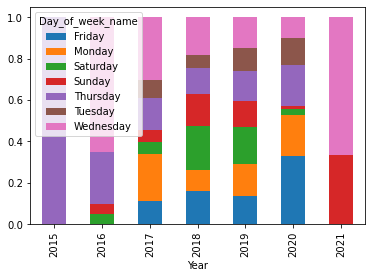

In [26]:
amount_table_1 = df.groupby(by=['Year'])['Day_of_week_name'].value_counts(normalize = True).unstack('Day_of_week_name')
amount_table_1.plot.bar(stacked = True)

In [27]:
amount_table_1.head()

Day_of_week_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2015,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
2016,NaN,NaN,0.050000,0.050000,0.250000,NaN,0.650000
2017,0.110294,0.227941,0.058824,0.058824,0.154412,0.088235,0.301471
2018,0.162791,0.098837,0.215116,0.151163,0.127907,0.063953,0.180233
2019,0.138211,0.154472,0.178862,0.121951,0.146341,0.113821,0.146341


<AxesSubplot:>

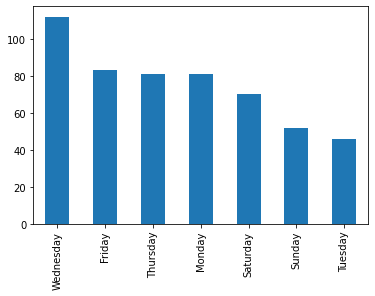

In [28]:
df['Day_of_week_name'].value_counts().plot.bar()

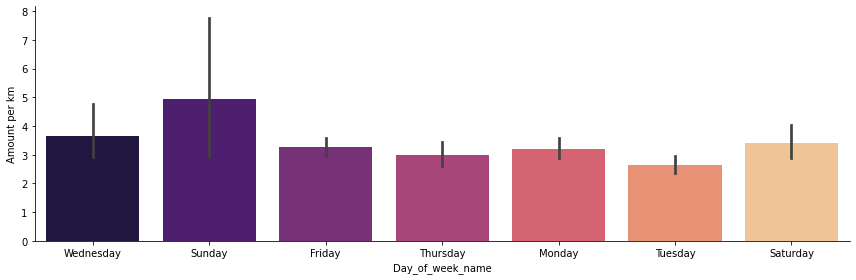

In [29]:
sns.catplot(data = df, x = 'Day_of_week_name', y = 'Amount per km', kind = 'bar', height=4, aspect=3, palette='magma')

In [30]:
#Which is the longest / shortest and most expensive / cheapest ride?

In [31]:
pd.concat([df[df['trip_duration'] == df['trip_duration'].max()],df[df['trip_duration'] == df['trip_duration'].min()]])

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,...,Month,Day,Day_of_week,Day_of_week_name,Date,time,Distance (km),Amount per km,request_lead_time,trip_duration
303,323,458,Pool,COMPLETED,2018-03-20 10:26:40,2018-03-20 10:33:15,-23.503361,-46.636535,2018-03-20 12:05:06,-23.601967,...,3,20,1,Tuesday,2018-03-20,10:26:40,22.86,1.519248,6.6,91.8
54,54,458,UberX,DRIVER_CANCELED,2020-02-05 10:59:41,NaT,-23.569461,-46.671784,NaT,-23.559310,...,2,5,2,Wednesday,2020-02-05,10:59:41,0.03,NaN,NaN,-26348350.1


In [32]:
print('Max trip duration = ', df['trip_duration'].max())
print('Min trip duration = ', df['trip_duration'].min())

Max trip duration =  91.8
Min trip duration =  -26348350.1


In [33]:
pd.concat([df[df['Fare Amount'] == df['Fare Amount'].max()],df[df['Fare Amount'] == df['Fare Amount'].min()]])

,index,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,...,Month,Day,Day_of_week,Day_of_week_name,Date,time,Distance (km),Amount per km,request_lead_time,trip_duration
179,184,458,NaN,COMPLETED,2019-03-06 22:35:30,2019-03-06 22:35:33,-23.589843,-46.634286,2019-03-06 23:19:09,-23.589843,...,3,6,2,Wednesday,2019-03-06,22:35:30,7.26,13.140496,0.1,43.6
8,8,458,UberX,CANCELED,2020-12-04 22:11:42,NaT,-23.545380,-46.648098,NaT,-23.552162,...,12,4,4,Friday,2020-12-04,22:11:42,0.00,NaN,NaN,0.0
10,10,458,UberX,CANCELED,2020-12-04 21:46:05,NaT,-23.569710,-46.665100,NaT,-23.569324,...,12,4,4,Friday,2020-12-04,21:46:05,0.00,NaN,NaN,0.0
11,11,458,UberX,CANCELED,2020-12-04 21:44:48,NaT,-23.570309,-46.662003,NaT,-23.569881,...,12,4,4,Friday,2020-12-04,21:44:48,0.00,NaN,NaN,0.0
17,17,458,UberX,CANCELED,2020-11-30 10:57:13,NaT,-23.558155,-46.662205,NaT,-23.564268,...,11,30,0,Monday,2020-11-30,10:57:13,0.00,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,526,458,UberX,CANCELED,2017-01-10 10:43:21,NaT,-23.599592,-46.642877,NaT,-23.599615,...,1,10,1,Tuesday,2017-01-10,10:43:21,0.00,NaN,NaN,0.0
503,532,458,Pool,CANCELED,2017-01-04 10:27:44,NaT,-23.589730,-46.630029,NaT,-23.589729,...,1,4,2,Wednesday,2017-01-04,10:27:44,0.00,NaN,NaN,0.0
506,535,458,UberX,CANCELED,2016-12-14 10:52:25,NaT,-23.602669,-46.647432,NaT,-23.602666,...,12,14,2,Wednesday,2016-12-14,10:52:25,0.00,NaN,NaN,0.0
508,537,458,Pool,CANCELED,2016-11-30 10:46:04,NaT,-23.606580,-46.661284,NaT,-23.604263,...,11,30,2,Wednesday,2016-11-30,10:46:04,0.00,NaN,NaN,0.0


In [34]:
print('Max fare = ', df['Fare Amount'].max())
print('Min fare = ', df['Fare Amount'].min())

Max fare =  95.4
Min fare =  0.0


In [35]:
#What is the average lead time before requesting a trip?
print('Average Lead time = ', round(df['request_lead_time'].mean(),2),'minutes')

Average Lead time =  5.28 minutes


In [36]:
df = df.drop('index', axis = 1)
df.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,...,Month,Day,Day_of_week,Day_of_week_name,Date,time,Distance (km),Amount per km,request_lead_time,trip_duration
0,458,NaN,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,...,1,13,2,Wednesday,2021-01-13,22:06:46,7.79,3.803594,4.4,18.1
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,...,1,13,2,Wednesday,2021-01-13,20:21:05,8.54,2.442623,6.4,27.4
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,...,1,3,6,Sunday,2021-01-03,00:23:22,9.49,3.606955,9.6,17.9
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,...,12,11,4,Friday,2020-12-11,23:16:33,31.76,1.850441,11.0,65.2
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,...,12,11,4,Friday,2020-12-11,00:35:46,4.09,3.088020,11.0,11.2


In [37]:
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
print('columns having nan values = ',features_nan)
numerical_feat = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('columns having numerical values = ', numerical_feat)
categorical_feat = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('columns having string values = ', categorical_feat)

columns having nan values =  ['Product Type', 'Begin Trip Time', 'Dropoff Time', 'Amount per km', 'request_lead_time']
columns having numerical values =  ['City', 'Request Time', 'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng', 'Dropoff Time', 'Dropoff Lat', 'Dropoff Lng', 'Distance (miles)', 'Fare Amount', 'Year', 'Month', 'Day', 'Day_of_week', 'Date', 'Distance (km)', 'Amount per km', 'request_lead_time', 'trip_duration']
columns having string values =  ['Product Type', 'Trip or Order Status', 'Day_of_week_name', 'time']


In [38]:
df[['Amount per km', 'request_lead_time']] = df[['Amount per km', 'request_lead_time']].fillna(0)

In [39]:
df[numerical_feat].head()

,City,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Year,Month,Day,Day_of_week,Date,Distance (km),Amount per km,request_lead_time,trip_duration
0,458,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,2021,1,13,2,2021-01-13,7.79,3.803594,4.4,18.1
1,458,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,2021,1,13,2,2021-01-13,8.54,2.442623,6.4,27.4
2,458,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,2021,1,3,6,2021-01-03,9.49,3.606955,9.6,17.9
3,458,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,2020,12,11,4,2020-12-11,31.76,1.850441,11.0,65.2
4,458,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,2020,12,11,4,2020-12-11,4.09,3.088020,11.0,11.2


In [40]:
df[categorical_feat].head()

,Product Type,Trip or Order Status,Day_of_week_name,time
0,NaN,COMPLETED,Wednesday,22:06:46
1,UberX,COMPLETED,Wednesday,20:21:05
2,UberX,COMPLETED,Sunday,00:23:22
3,UberX,COMPLETED,Friday,23:16:33
4,UberX,COMPLETED,Friday,00:35:46


In [41]:
#dealing with categorical features
dict_1 = {'COMPLETED' : 1, 'CANCELED' : 2, 'DRIVER_CANCELED' : 3}
df['Trip or Order Status'] = df['Trip or Order Status'].map(dict_1)

dict_2 = {np.nan : 0, 'UberX' : 1, 'Pool' : 2, 'Black' : 3}
df['Product Type'] = df['Product Type'].map(dict_2)

In [42]:
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
print('columns having nan values = ',features_nan)
numerical_feat = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('columns having numerical values = ', numerical_feat)
categorical_feat = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('columns having string values = ', categorical_feat)

columns having nan values =  ['Begin Trip Time', 'Dropoff Time']
columns having numerical values =  ['City', 'Product Type', 'Trip or Order Status', 'Request Time', 'Begin Trip Time', 'Begin Trip Lat', 'Begin Trip Lng', 'Dropoff Time', 'Dropoff Lat', 'Dropoff Lng', 'Distance (miles)', 'Fare Amount', 'Year', 'Month', 'Day', 'Day_of_week', 'Date', 'Distance (km)', 'Amount per km', 'request_lead_time', 'trip_duration']
columns having string values =  ['Day_of_week_name', 'time']


<AxesSubplot:>

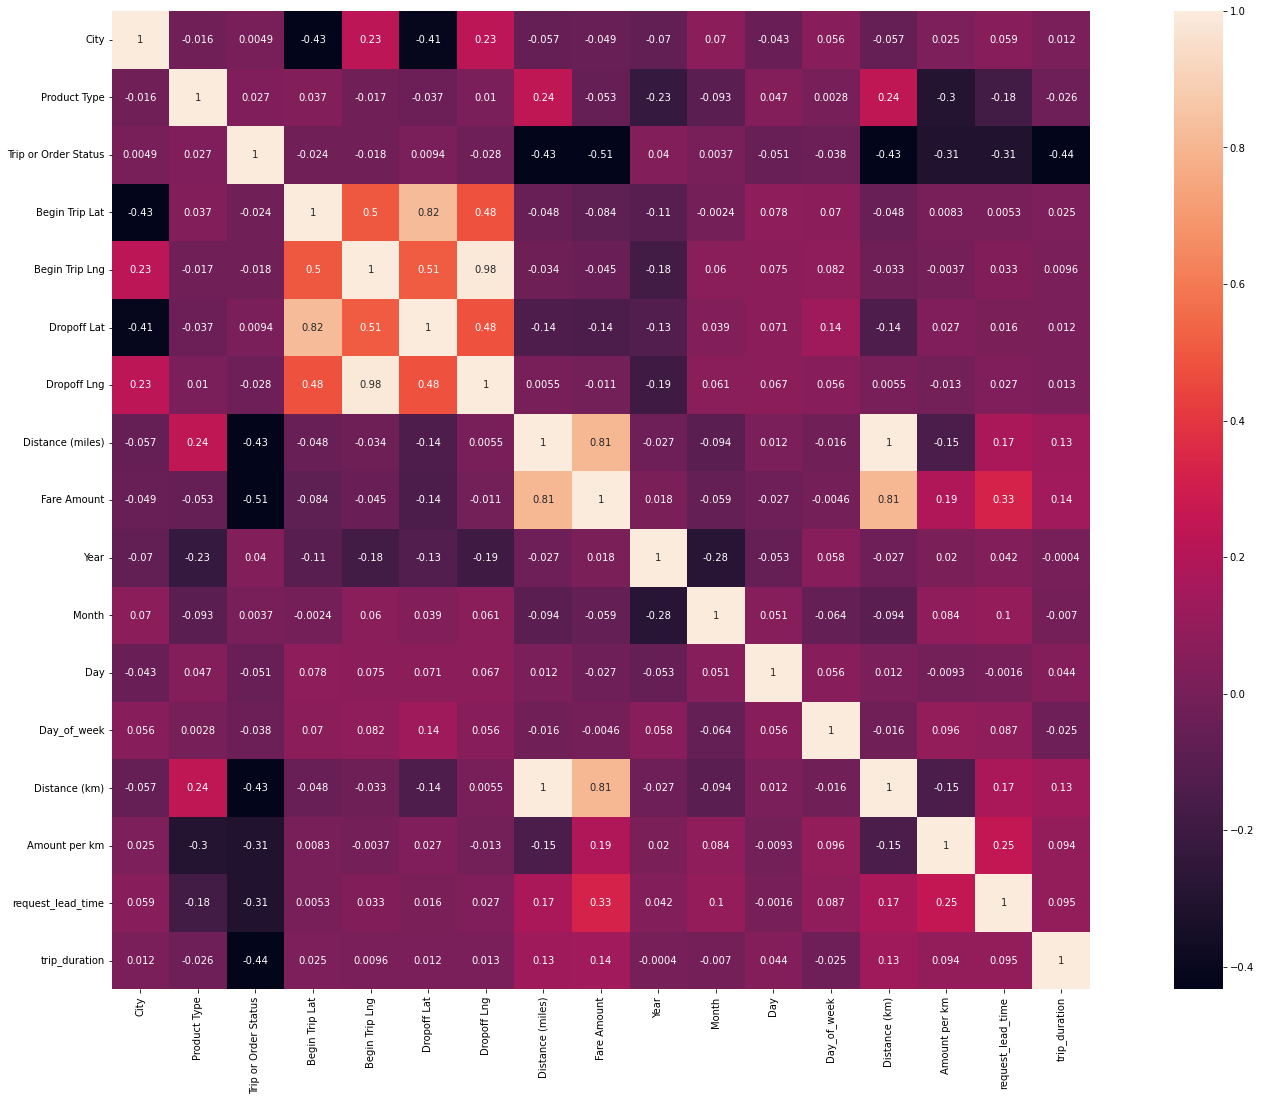

In [43]:
plt.figure(figsize = (30,18))
sns.heatmap(df.corr(), robust = True, annot = True, square = True)

In [44]:
temporal_feat = [feature for feature in df.columns if 'Year' in feature or 'Month'in feature or 'Day'in feature or 'Day_of_week'in feature or 'Date'in feature or 'time'in feature or 'Time' in feature]
temporal_feat

['Request Time',
 'Begin Trip Time',
 'Dropoff Time',
 'Year',
 'Month',
 'Day',
 'Day_of_week',
 'Day_of_week_name',
 'Date',
 'time',
 'request_lead_time']

In [45]:
discrete_feat = [feature for feature in numerical_feat if len(df[feature].unique()) < 25 and feature not in temporal_feat + ['Fare Amount']]
discrete_feat

['City', 'Product Type', 'Trip or Order Status']

In [46]:
conti_feat = [feature for feature in numerical_feat if feature not in discrete_feat + temporal_feat + ['Fare Amount']]
conti_feat

['Begin Trip Lat',
 'Begin Trip Lng',
 'Dropoff Lat',
 'Dropoff Lng',
 'Distance (miles)',
 'Distance (km)',
 'Amount per km',
 'trip_duration']

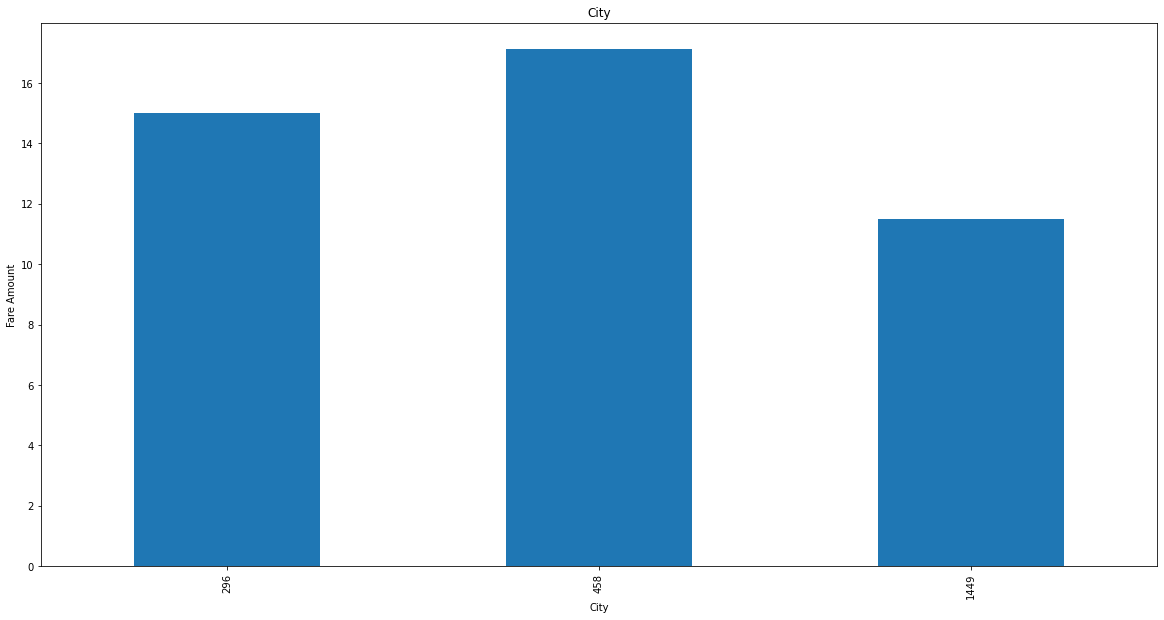

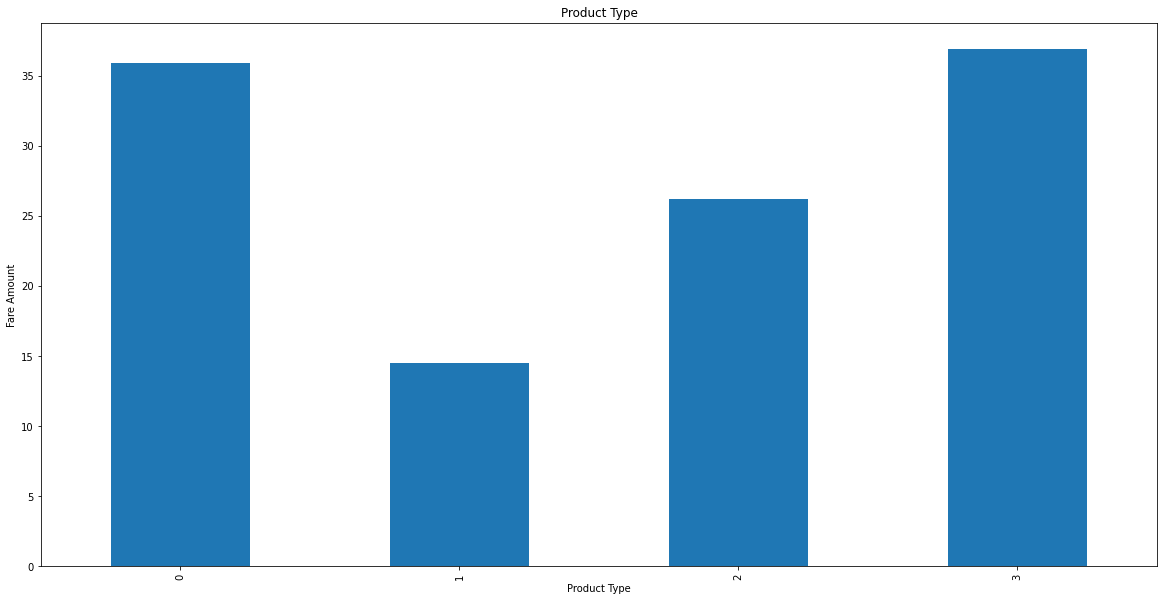

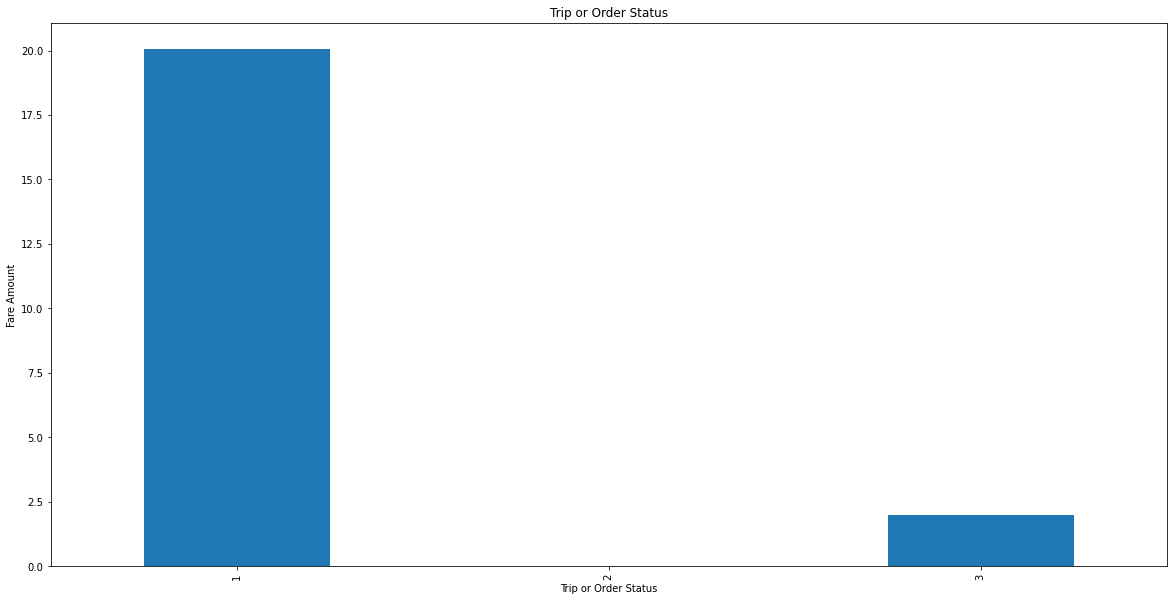

In [47]:
for feature in discrete_feat:
    data = df.copy()
    plt.figure(figsize = (20,10))
    data.groupby(feature)['Fare Amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Fare Amount')
    plt.title(feature)
    plt.show()

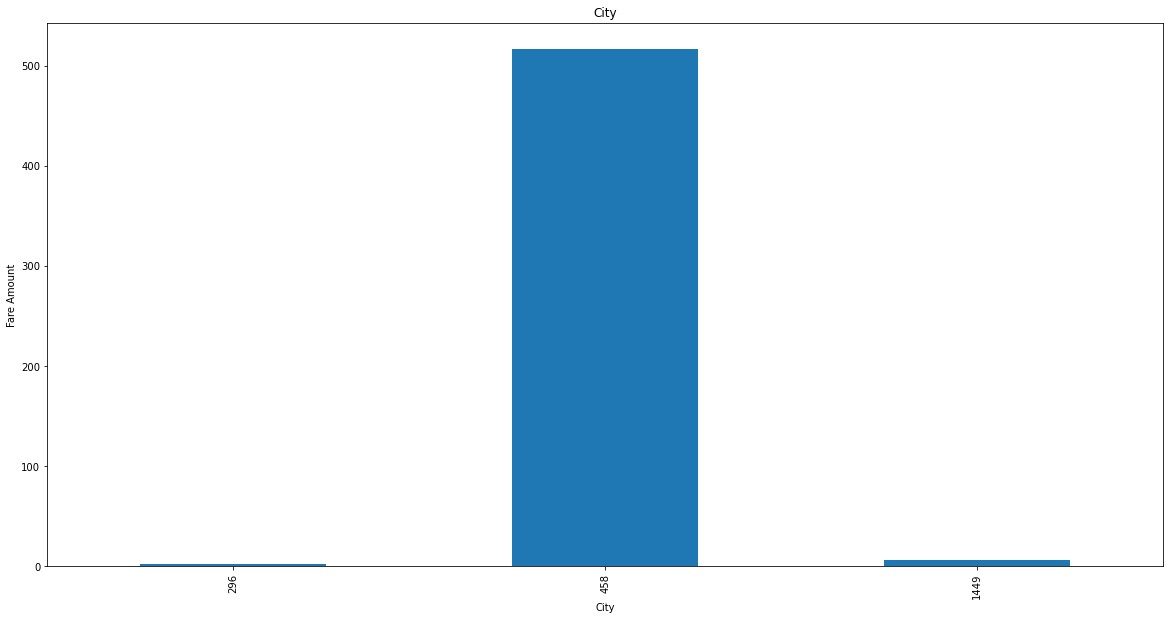

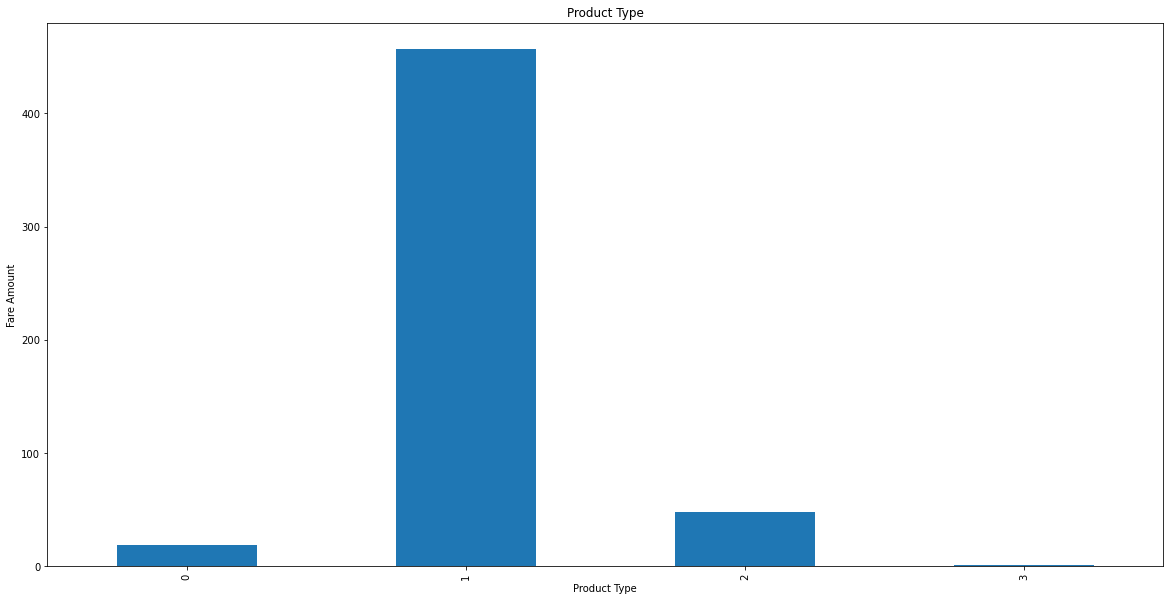

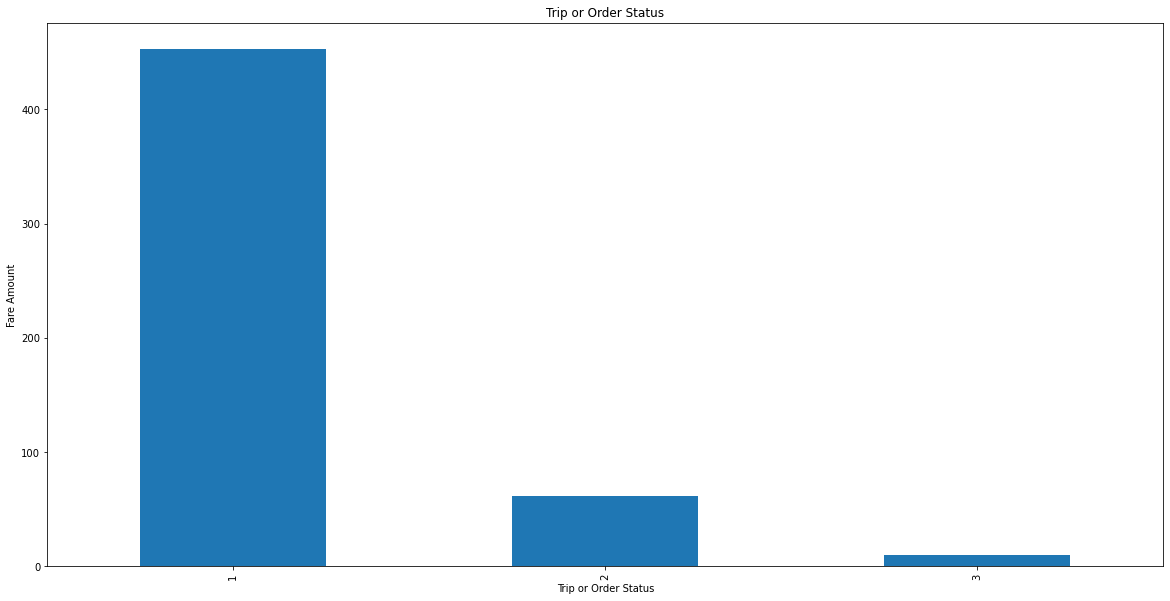

In [48]:
for feature in discrete_feat:
    data = df.copy()
    plt.figure(figsize = (20,10))
    data.groupby(feature)['Fare Amount'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Fare Amount')
    plt.title(feature)
    plt.show()

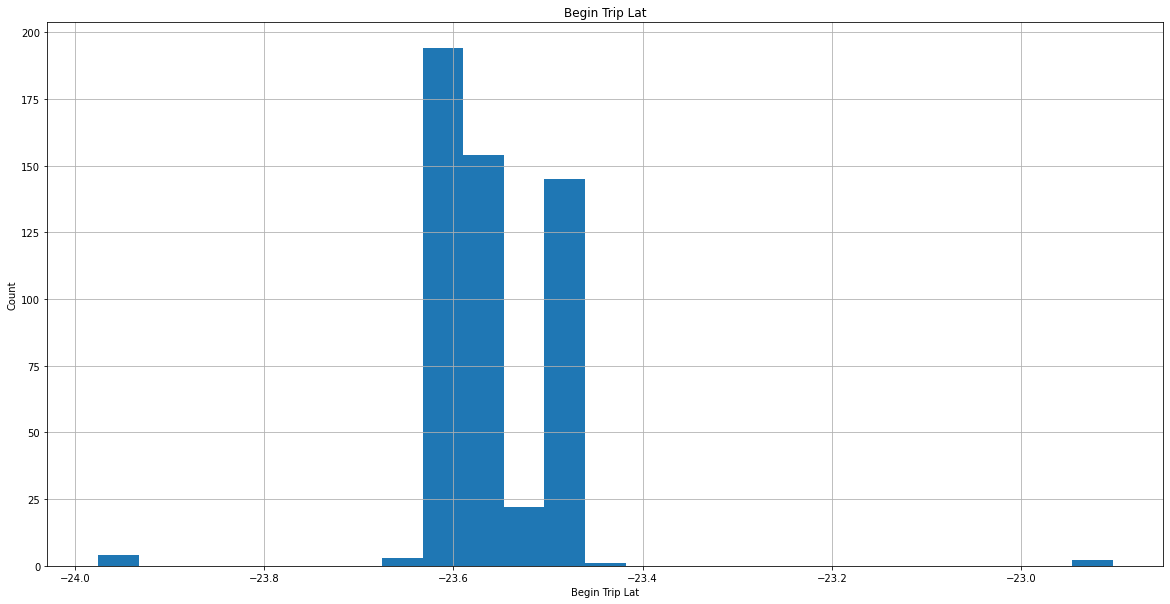

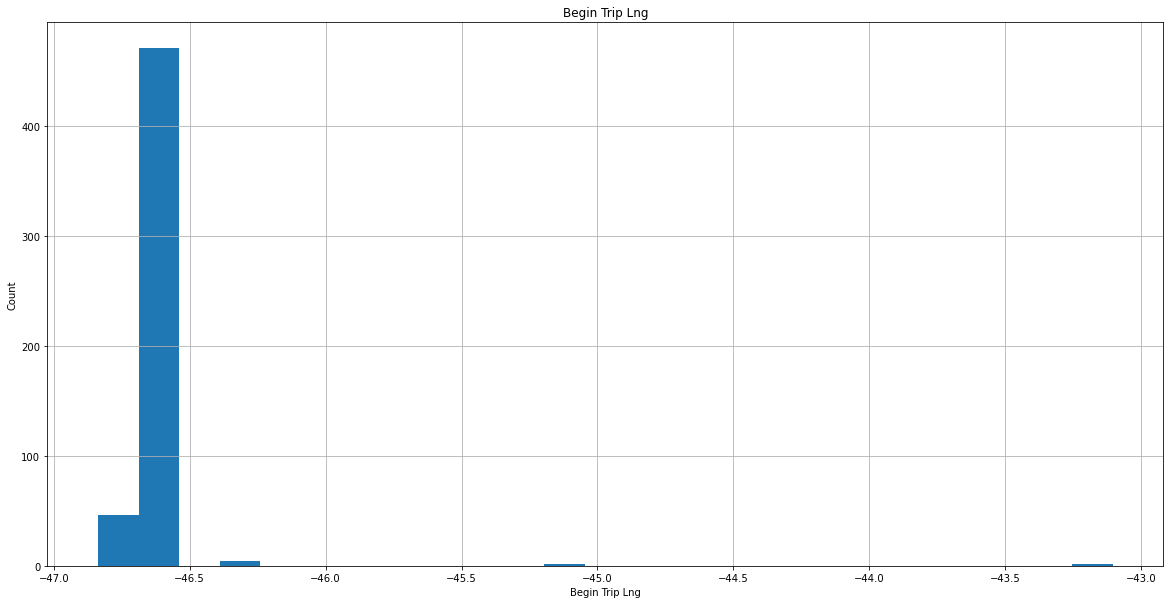

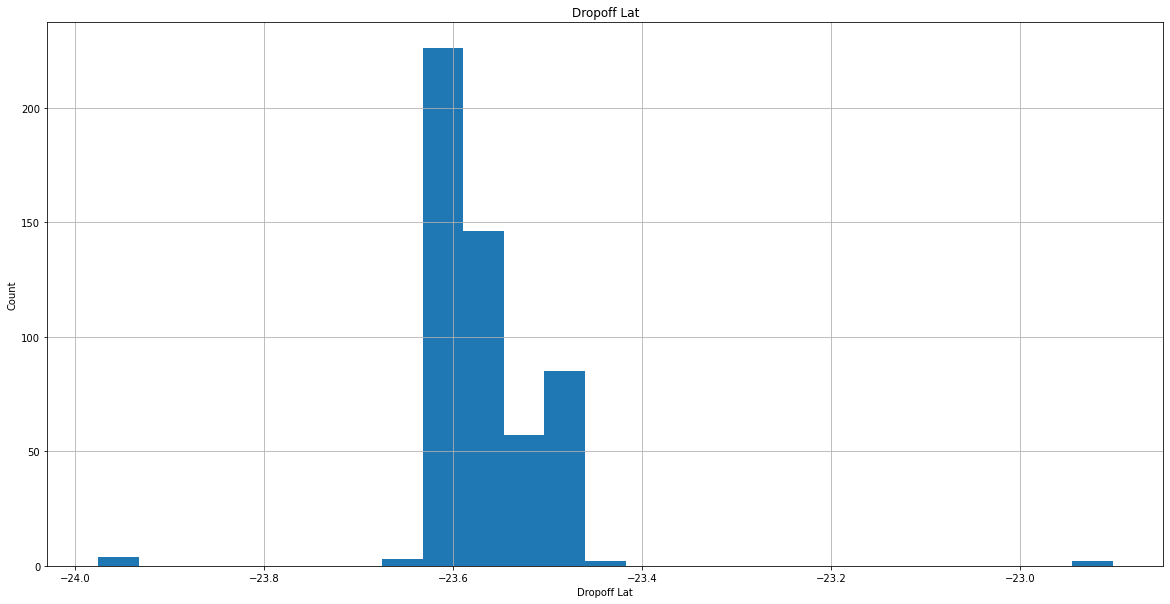

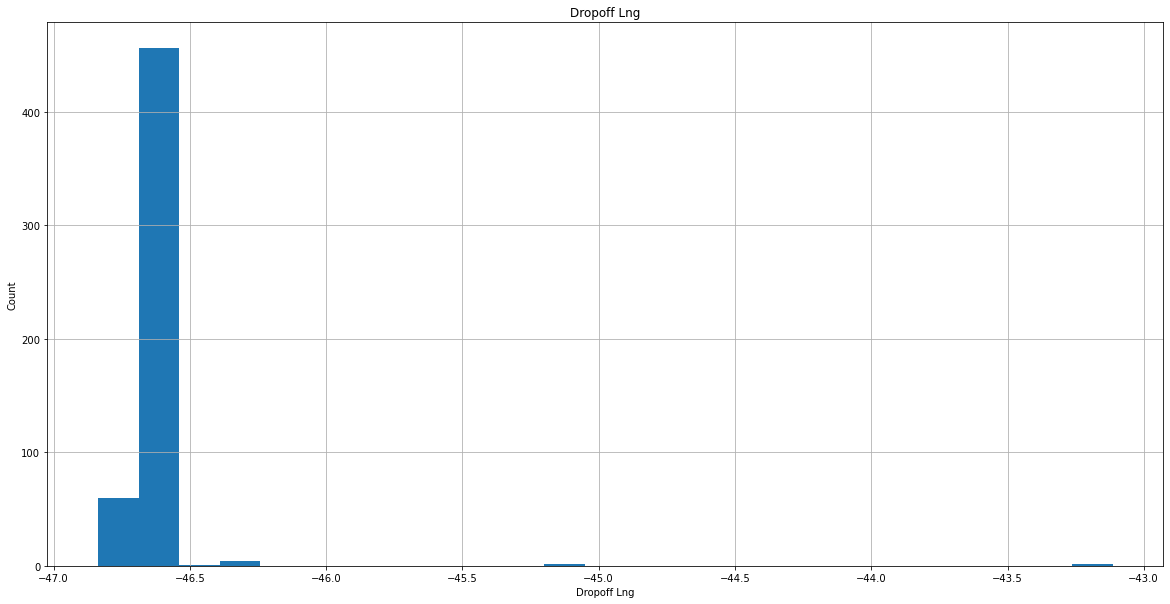

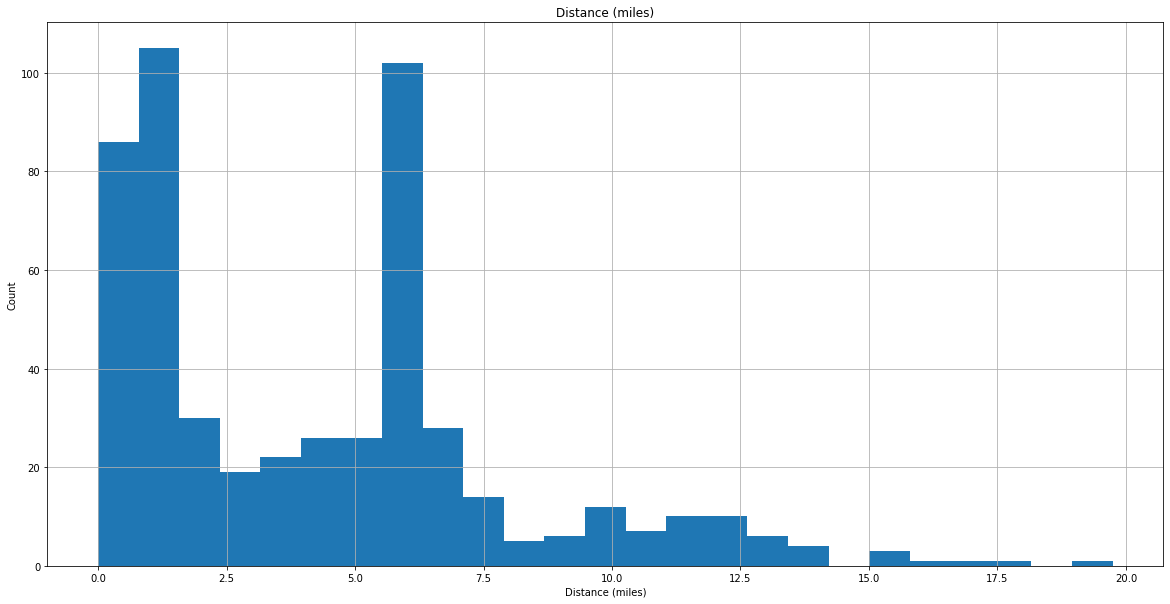

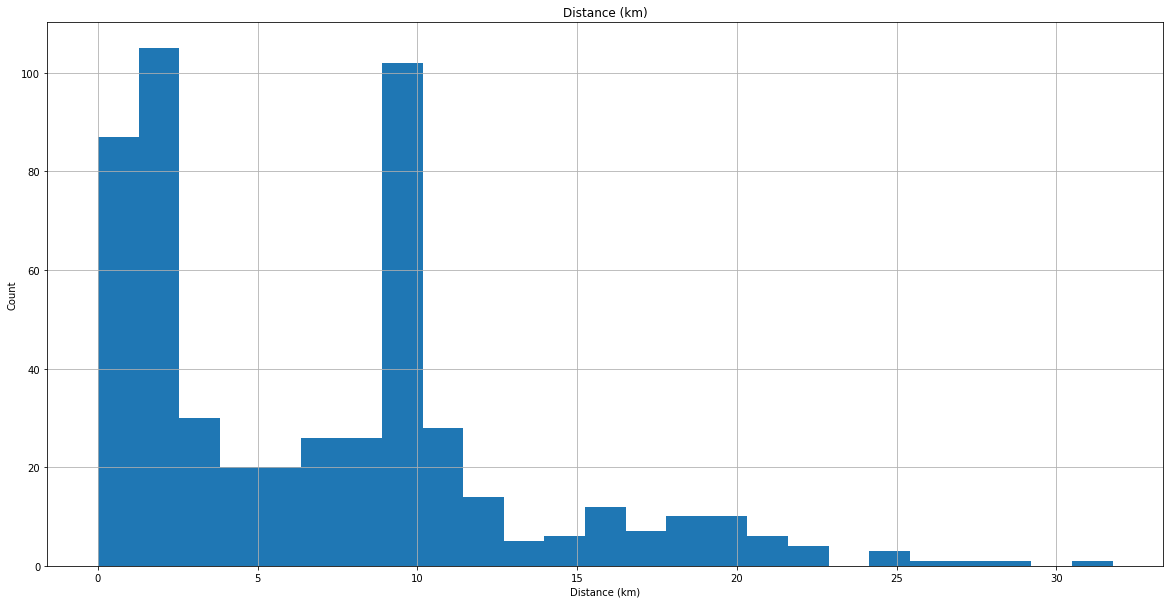

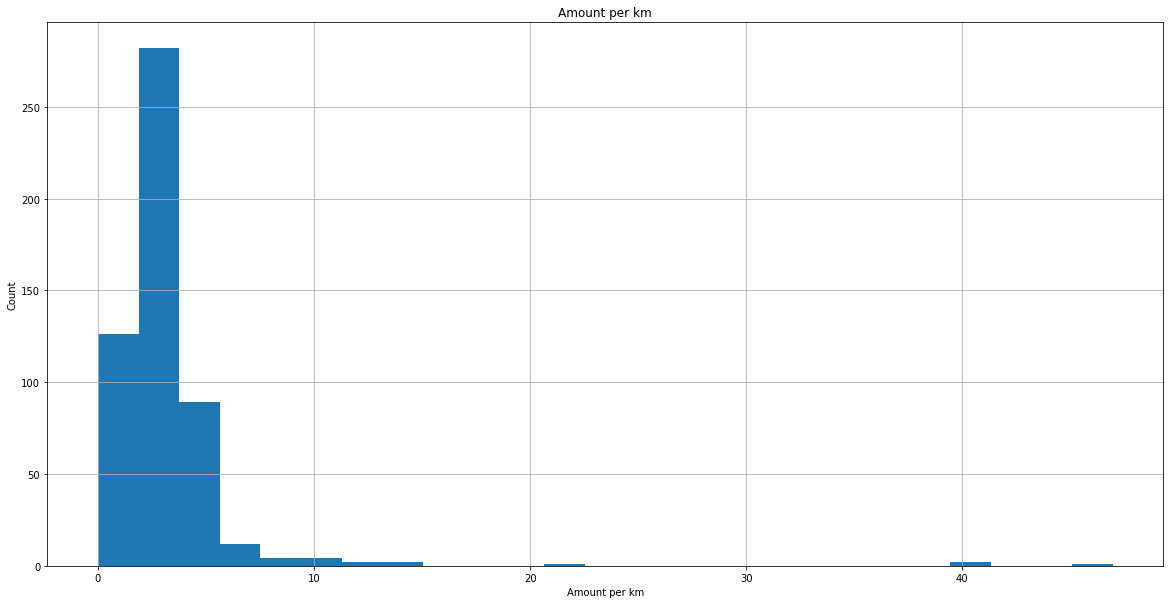

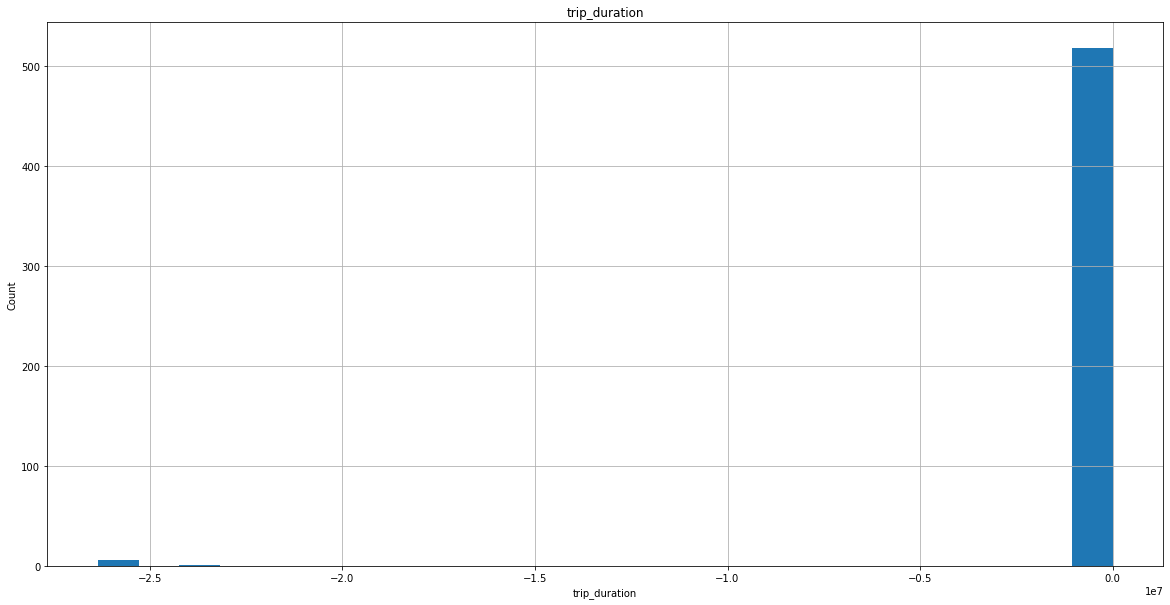

In [49]:
for feature in conti_feat:
    data = df.copy()
    plt.figure(figsize = (20,10))
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

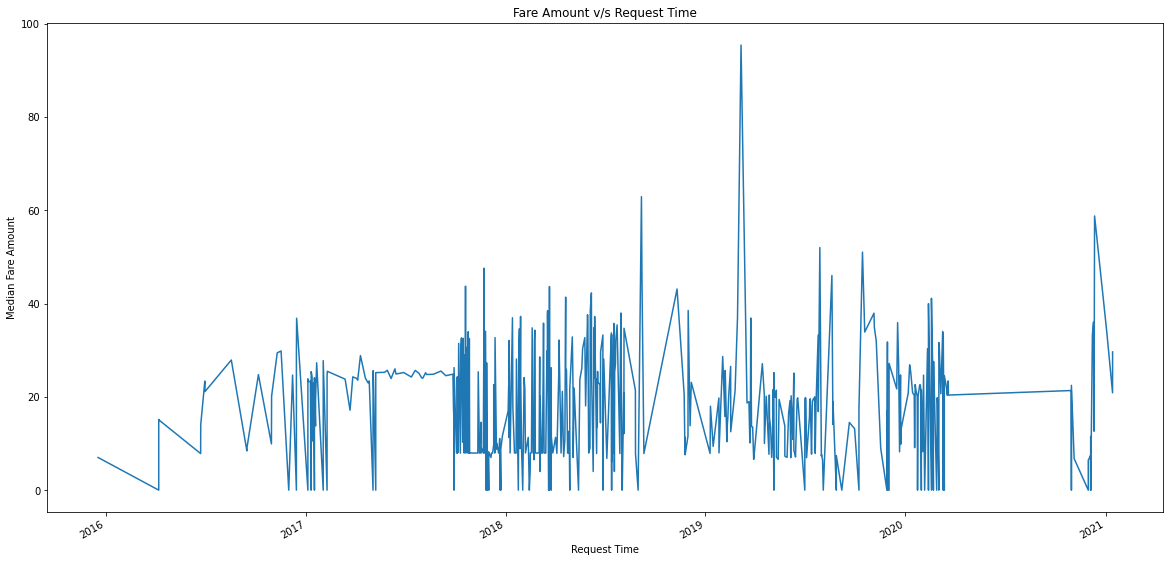

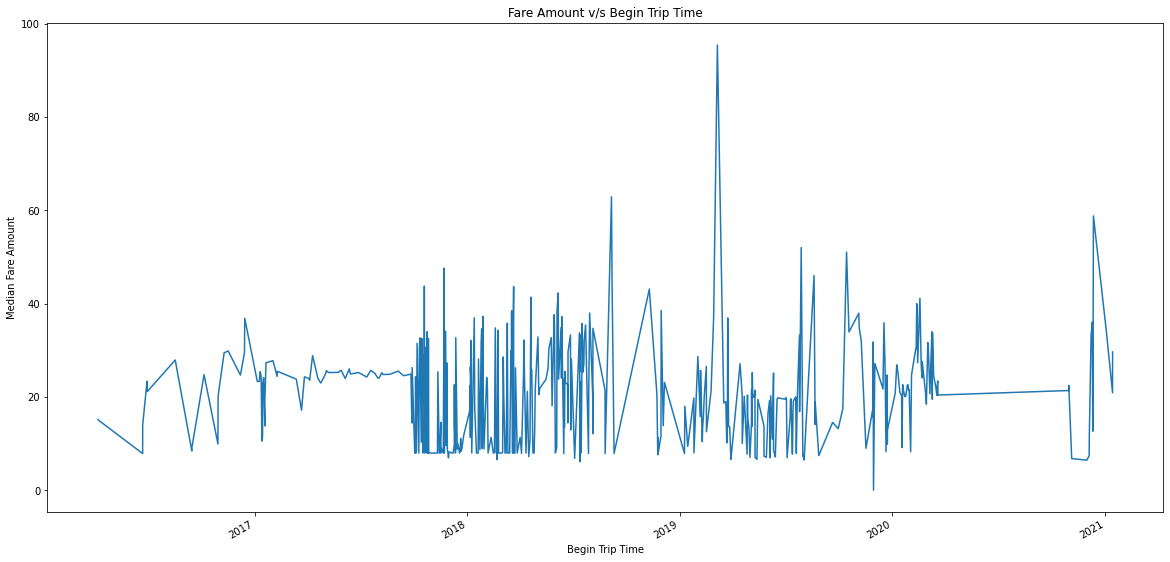

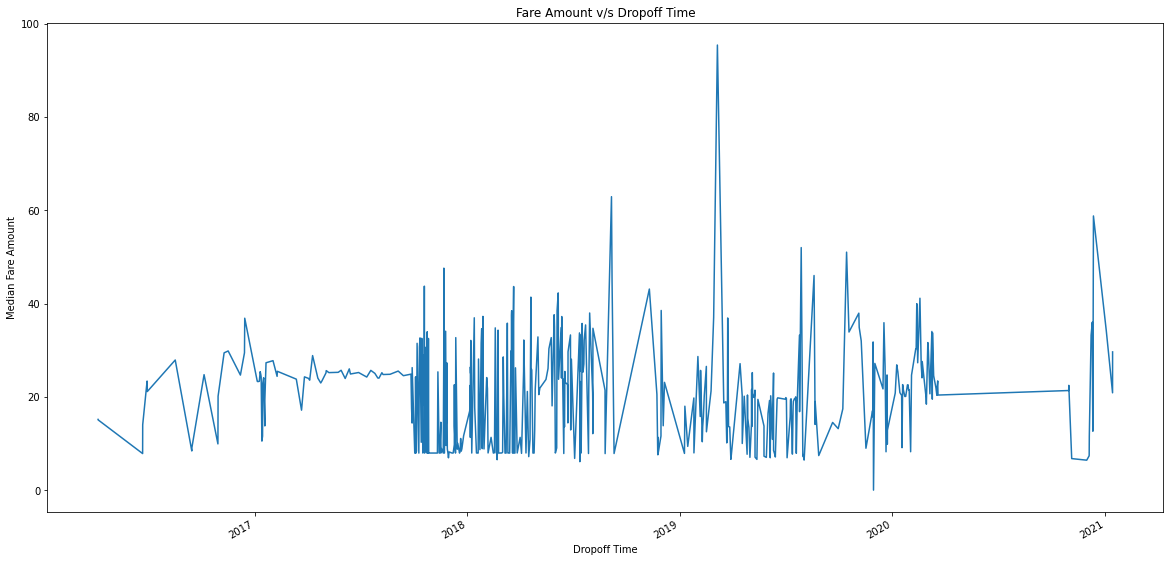

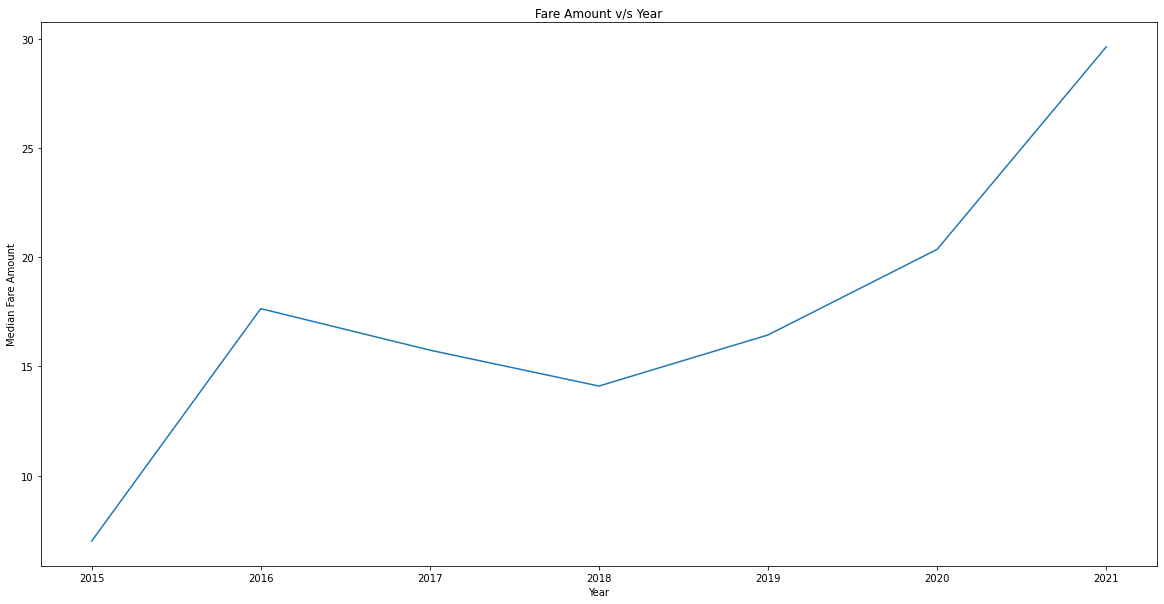

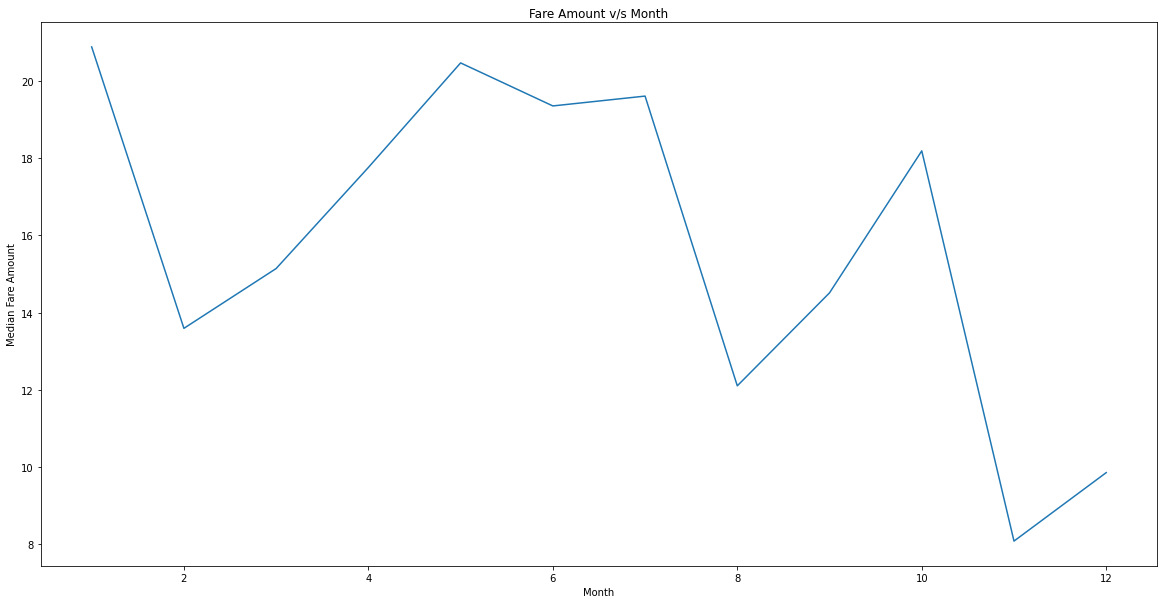

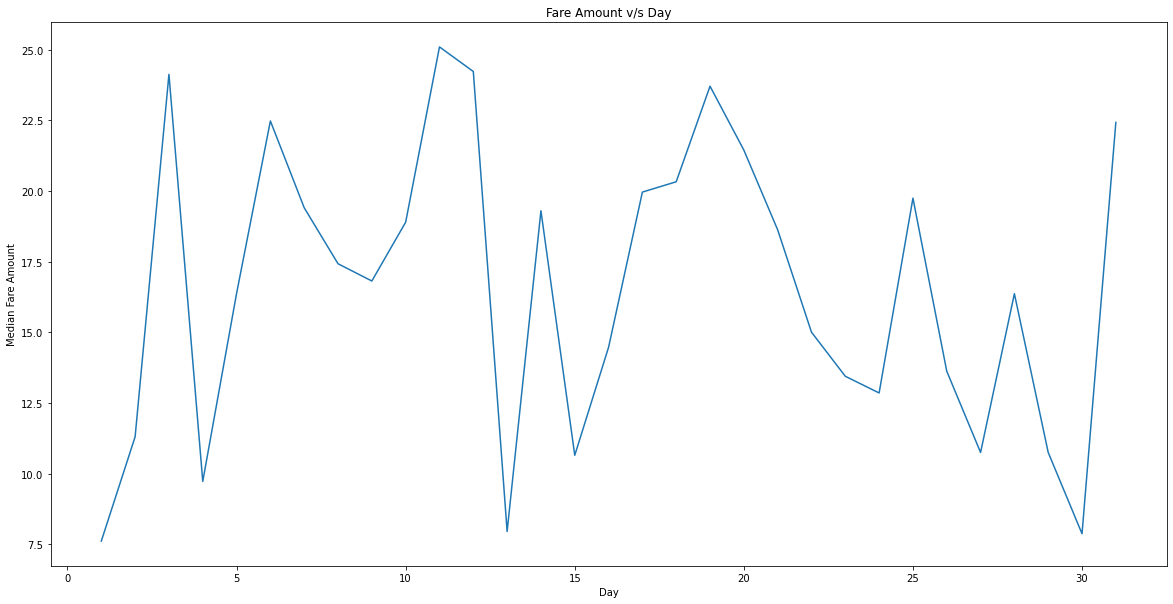

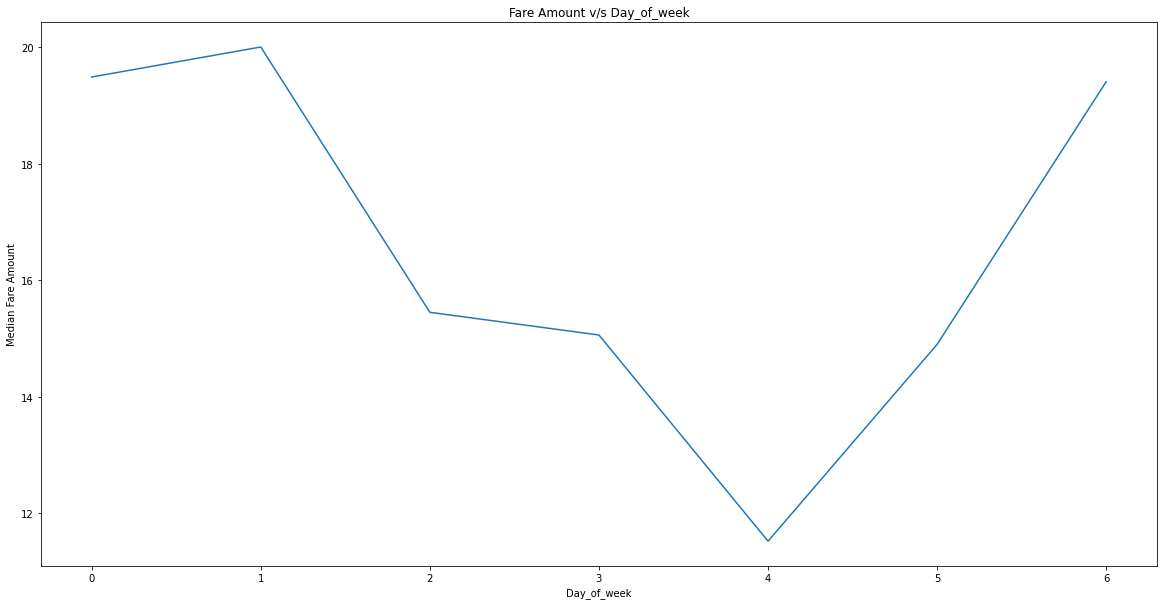

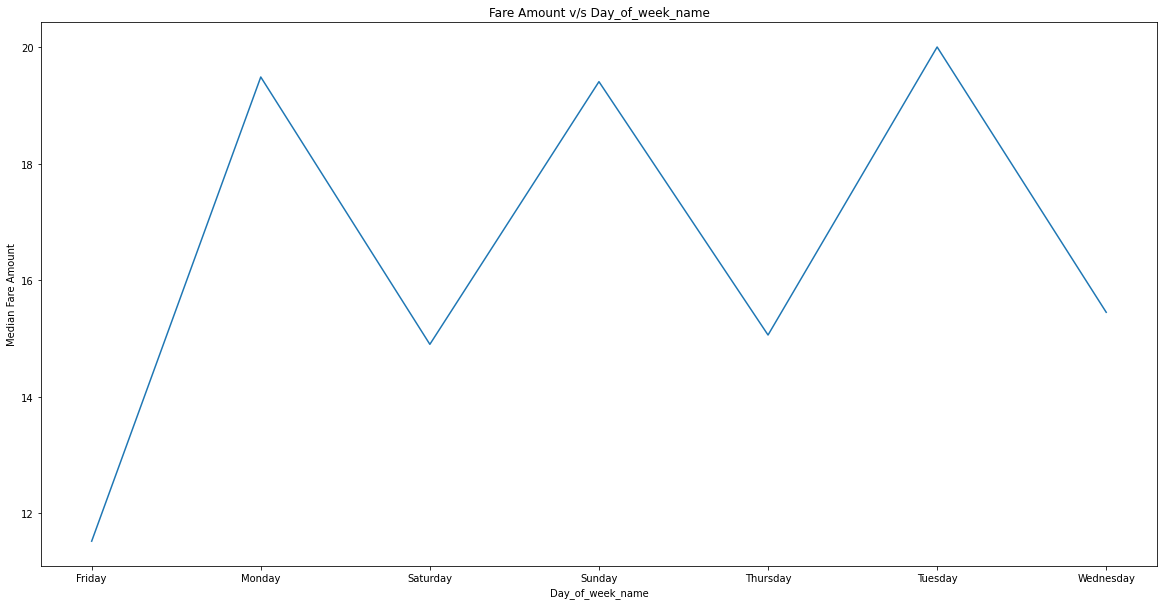

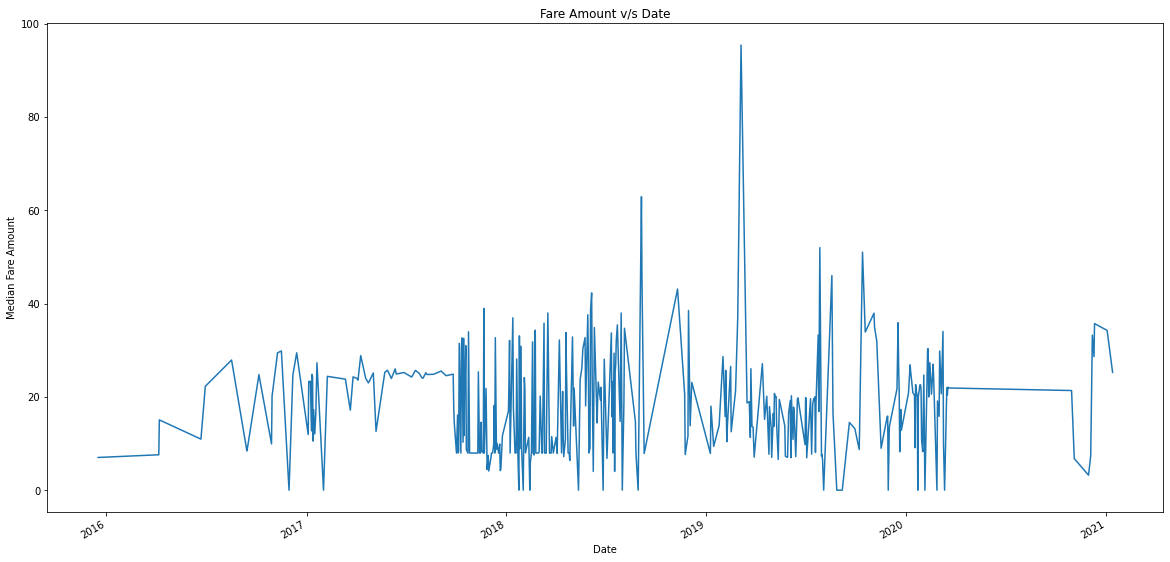

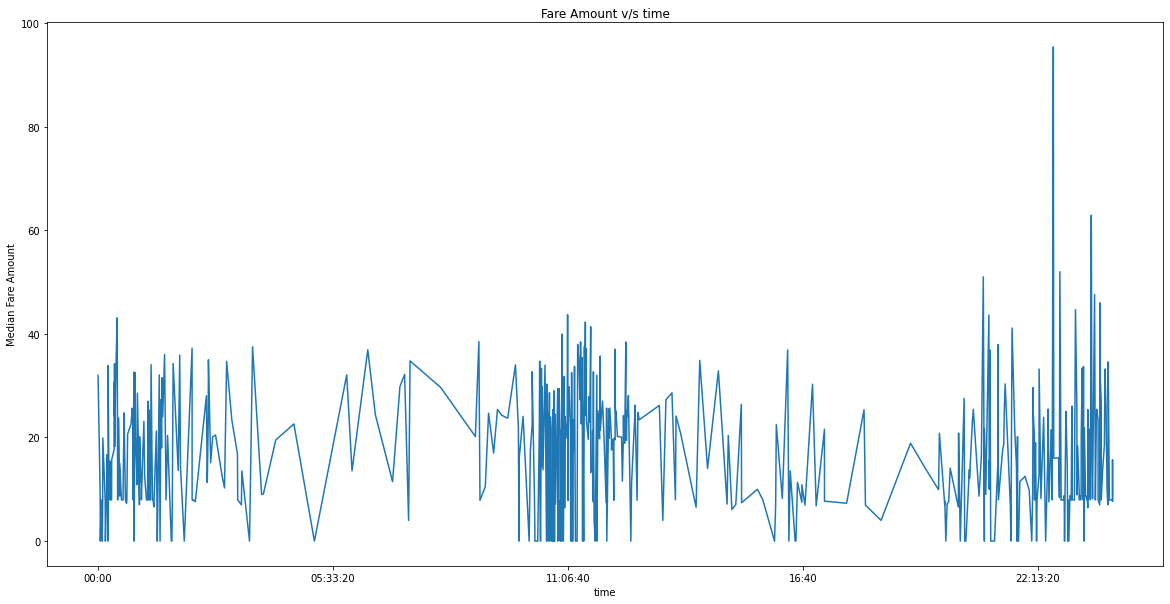

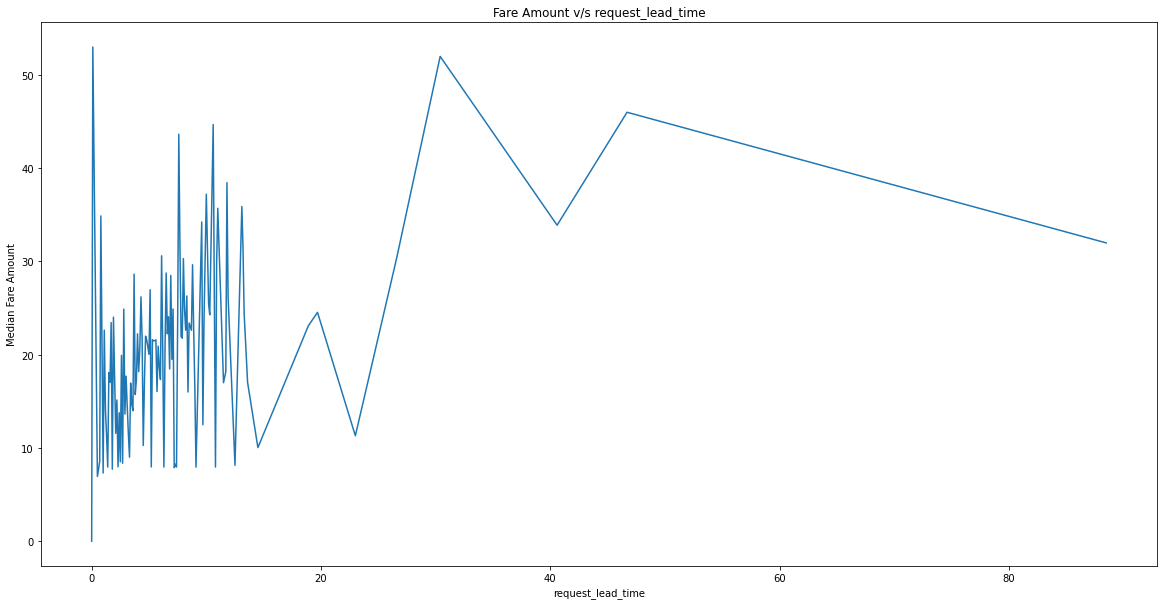

In [50]:
for feature in temporal_feat:
    data = df.copy()
    plt.figure(figsize = (20,10))
    data.groupby(feature)['Fare Amount'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median Fare Amount')
    plt.title(f'Fare Amount v/s {feature}')
    plt.show()

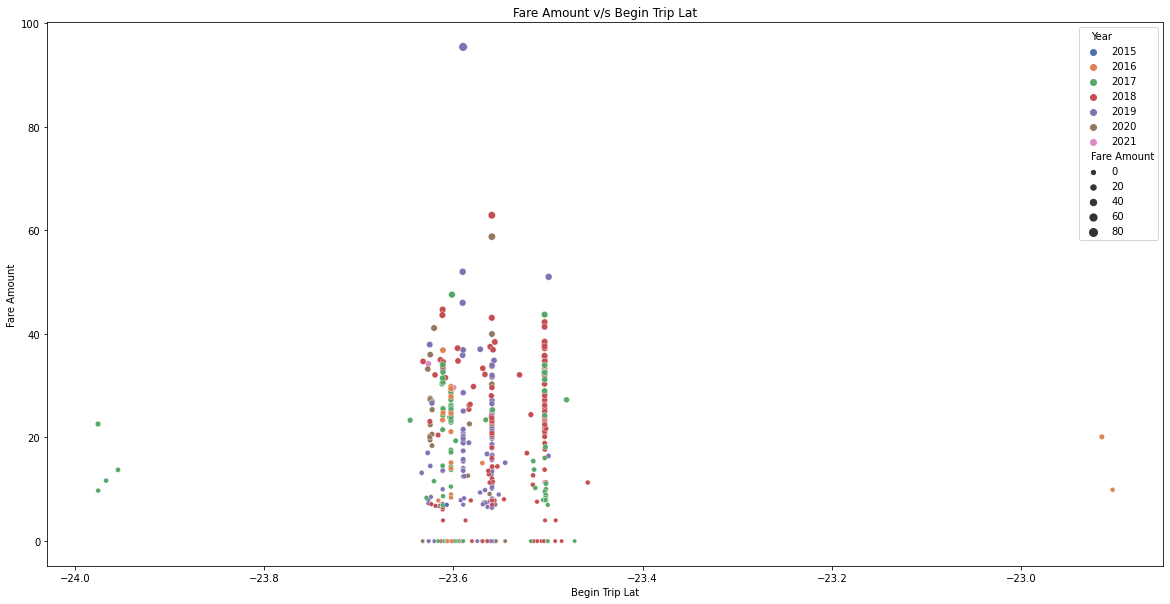

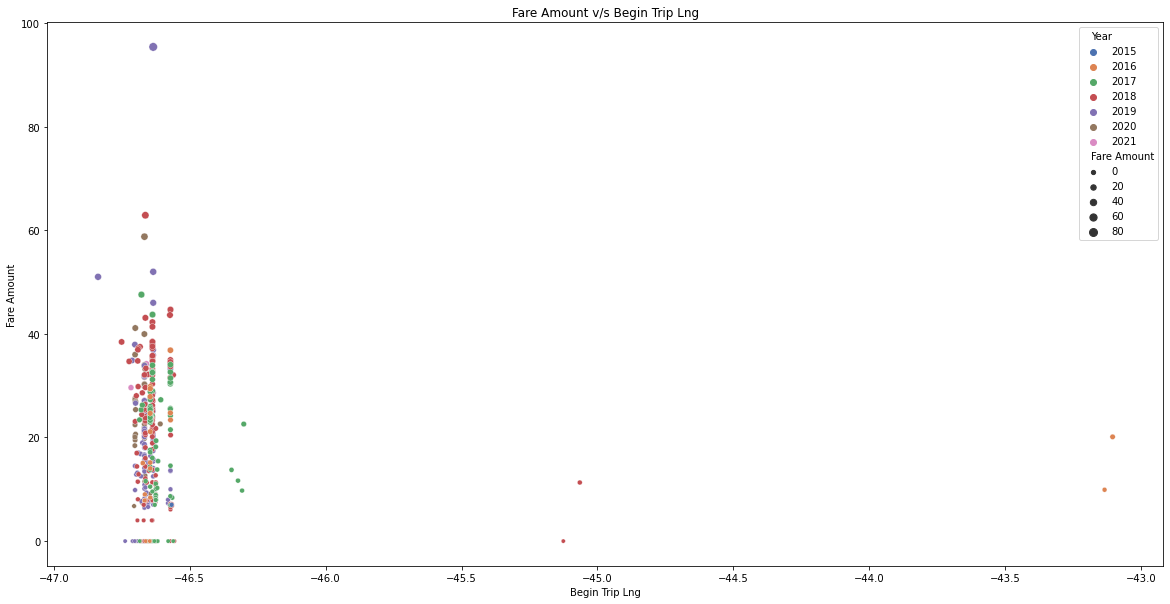

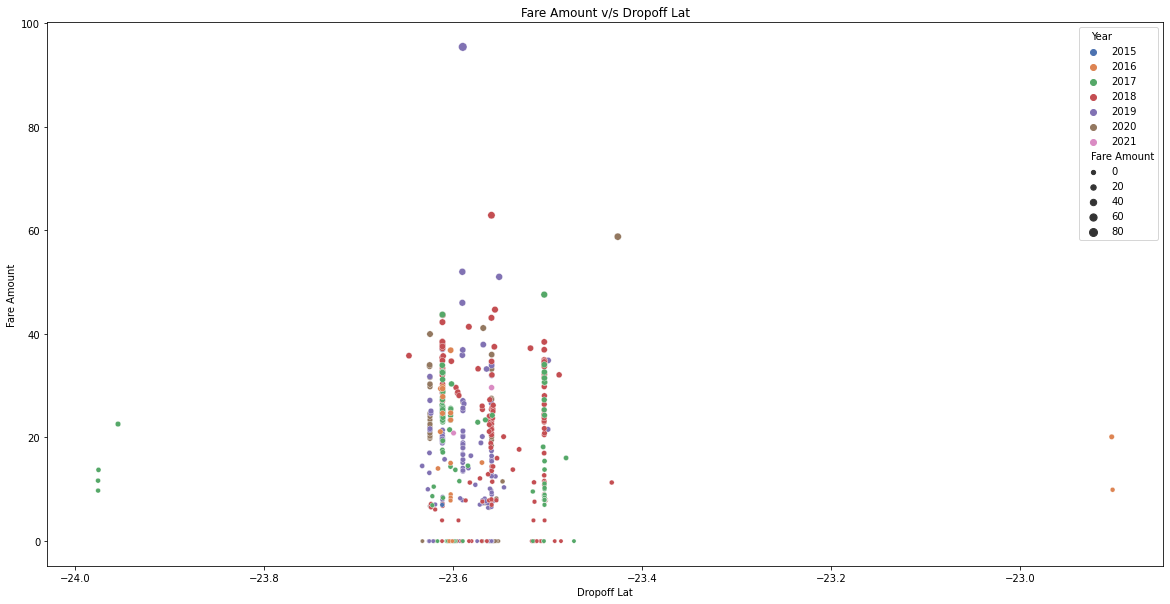

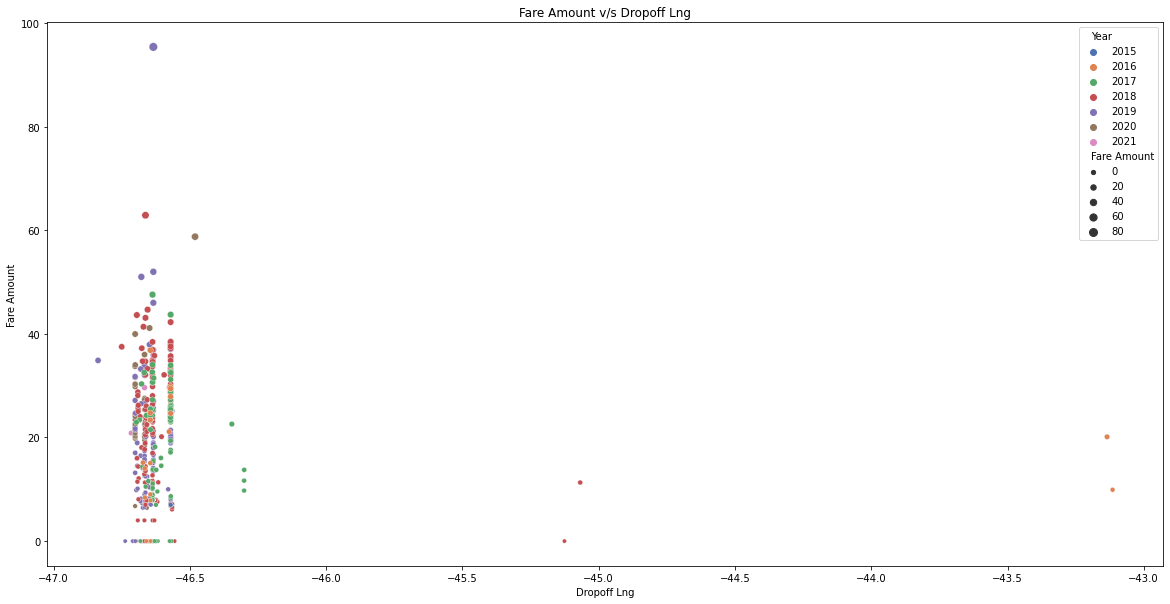

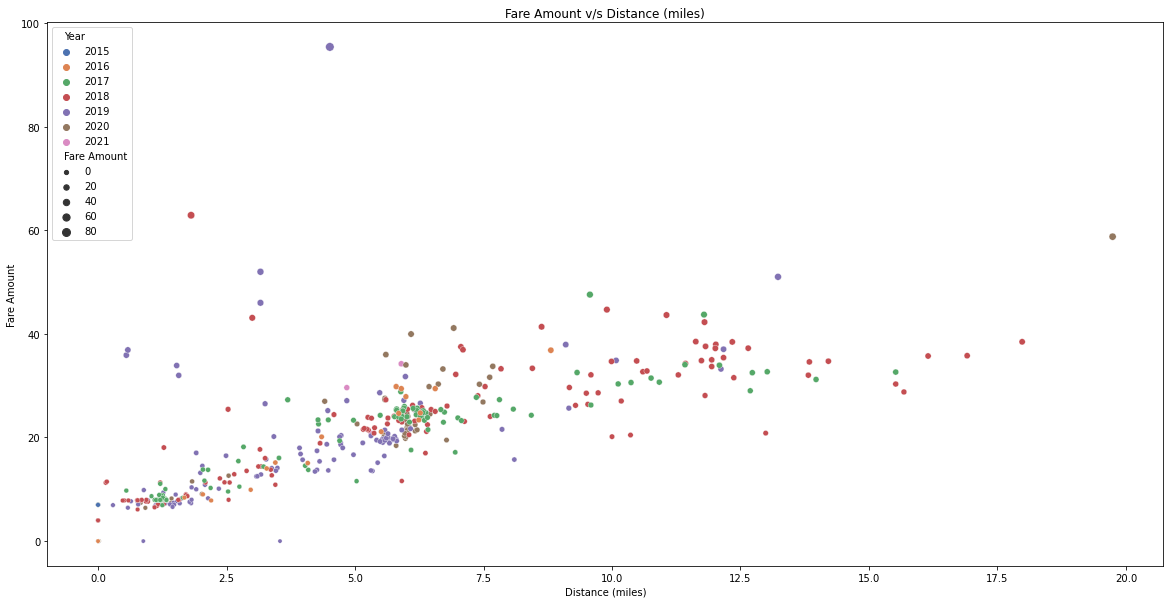

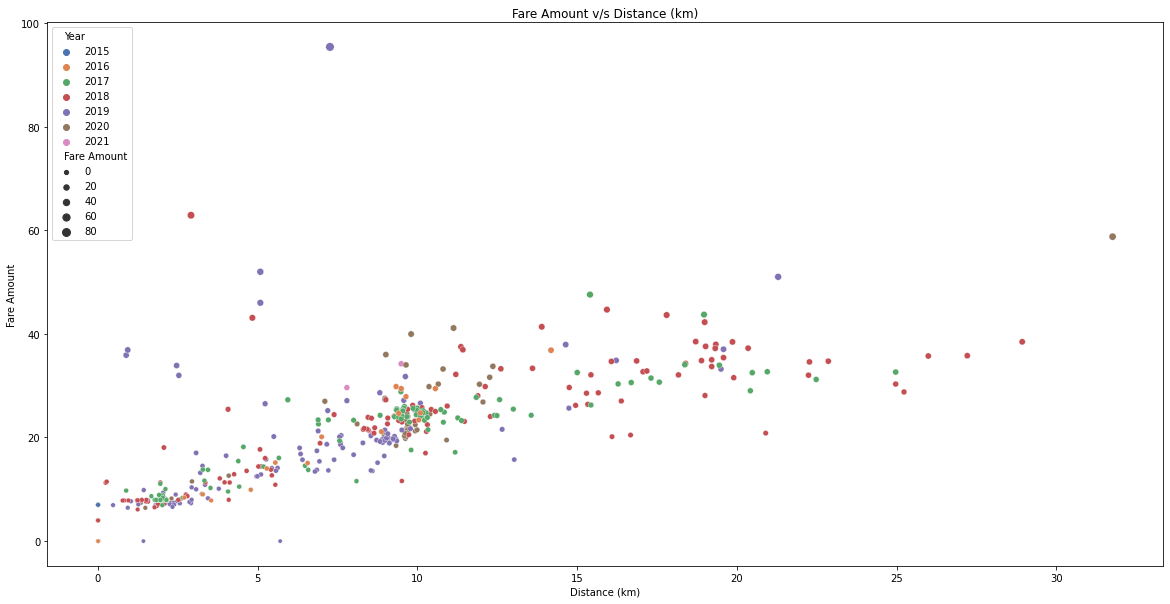

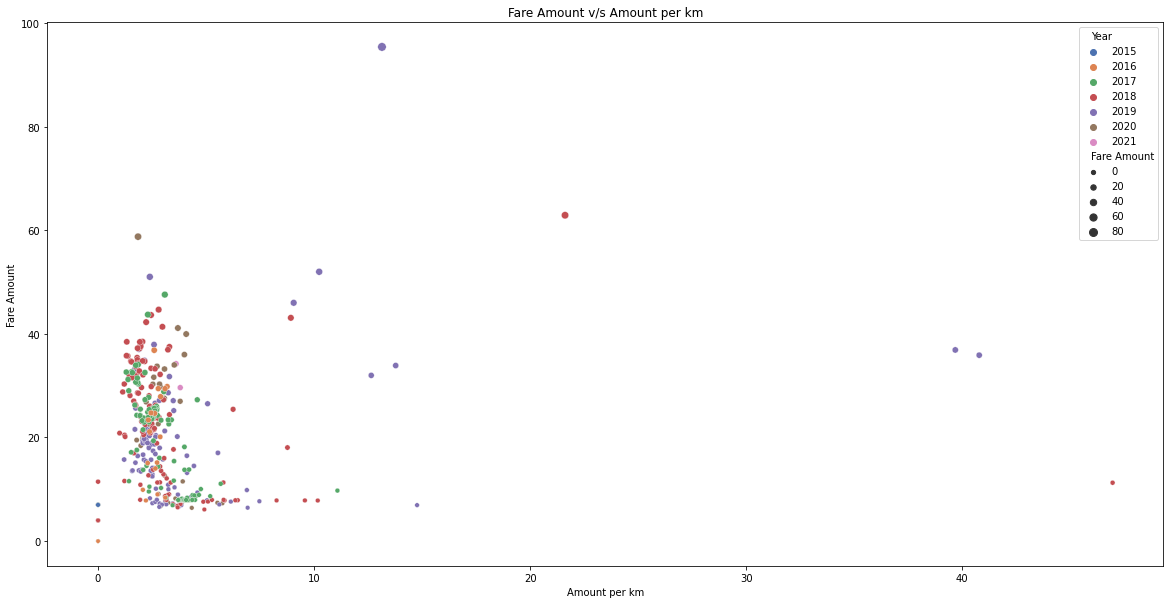

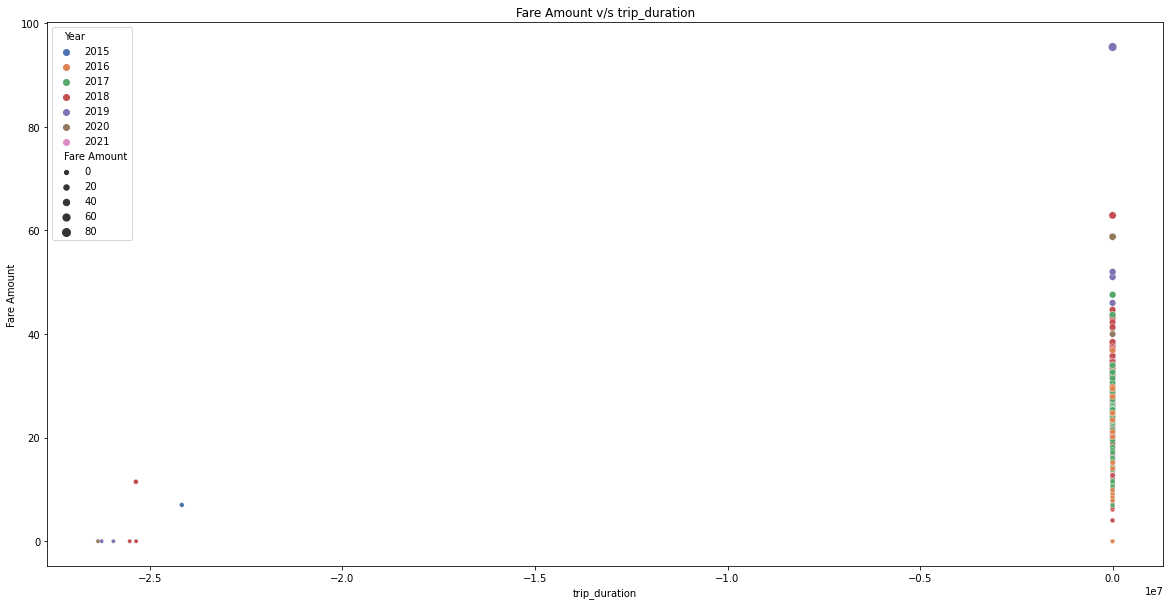

In [58]:
for feature in conti_feat:
    data = df.copy()
    plt.figure(figsize = (20,10))
    sns.scatterplot(data = data, x = feature, y = 'Fare Amount', hue = 'Year', palette = 'deep', legend = 'auto', size = 'Fare Amount')
    plt.xlabel(feature)
    plt.ylabel('Fare Amount')
    plt.title(f'Fare Amount v/s {feature}')
    plt.show()